<a href="https://colab.research.google.com/github/TamaVux/PdM/blob/main/supp_notebook/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook use for Time-series data only, such as signal process. This notebook explore in 3 domain: Time domain, Frequency domain and Time-Frequency domain.

# Import Data

In [ ]:
from google.colab import files
files.upload()

# TIME DOMAIN

|Features | Column outout name|
|----|----|
|Mean: normal, rolling, cumulative| mean , r_mean, c_mean|
|RMS (root mean square): normal, rolling, cumulative|rms, r_rms, c_rms|
|variance: rolling, cumulative| r_var, c_var |
|Kurtosis|
|Skewness| skew |
|Standard Deviation: rolling SD, cumulative|r_sd, c_sd|
|Crest factor: rolling, cumulative| r_crest, c_crest |

The <i>pd_allfeatures()</i> function will also plot all features out !

In [ ]:
# Example dataset
import pandas as pd
df = pd.DataFrame({'value': [1, 2, 3, 4,5,9,6,1,8,7,9,10,13,12,9]})

## Define function in time domain

In [ ]:
import pandas as pd
import numpy as np
### Use for a dataset, like pandas data frame, it will adda column to the data frame
class mine_time_domain:
  ####--------------------------------    MEAN    --------------------------------####
  # Calculate entire data mean
  def pd_mean(self,df,col):
    new_col_name = 'mean_{}'.format(col)
    try:
      df[new_col_name] = df[col].mean()
    except:
      print('Errors in pd_mean!')
    return df

  # Calculate rolling mean
  def pd_r_mean(self,df,col,window = 3):
    new_col_name = 'r_mean_{}'.format(col)
    try:
        df[new_col_name] = df[col].rolling(window=window,min_periods=1).mean()
    except:
      print('Errors in pd_r_mean!')
    return df

  # Calculate cumulative mean
  def pd_c_mean(self,df,col):
    new_col_name = 'c_mean_{}'.format(col)
    try:
      df[new_col_name] = df[col].cumsum() / (pd.Series(range(1, len(df) + 1)))
    except:
      print('Errors in pd_c_mean!')
    return df

  ####--------------------------------    RMS   --------------------------------####
  # Calculate RMS
  def pd_rms(self,df,col):
    new_col_name = 'rms_{}'.format(col)
    try:
      df[new_col_name] = np.sqrt( (df[col]**2).mean() )
    except:
      print('Errors in pd_rms!')
    return df

  # Calculate rolling RMS
  def pd_r_rms(self,df,col,window = 3):
    new_col_name = 'r_rms_{}'.format(col)
    try:
      df[new_col_name] = df[col].rolling(window=window,min_periods=1).apply(lambda x: np.sqrt((x**2).mean()), raw=False)
    except:
      print('Errors in pd_r_rms!')
    return df

  # Calculate cumulative RMS
  def pd_c_rms(self,df,col):
    new_col_name = 'c_rms_{}'.format(col)
    try:
      df[new_col_name] = df[col].expanding().apply(lambda x: np.sqrt((x**2).mean()), raw=False)
    except:
      print('Errors in pd_c_mean!')
    return df

  ####--------------------------------    VARIANCE   --------------------------------####
  # Calculate Cumulative Variance
  def pd_c_var(self,df,col):
    new_col_name = 'c_var_{}'.format(col)
    try:
      df[new_col_name] = df[col].expanding().var()
    except:
      print('Errors in pd_c_mean!')
    return df

  # Calculate rolling Variance
  def pd_r_var(self,df,col,window=3):
    new_col_name = 'r_var_{}'.format(col)
    try:
      df[new_col_name] = df[col].rolling(window=window,min_periods=1).var()
    except:
      print('Errors in pd_r_var!')
    return df

  ####--------------------------------    KURTOSIS  --------------------------------####
  # Calculate data Kurtosis

  ####--------------------------------    STANDARD DEVIATION  --------------------------------####
  # Calculate rolling standard deviation
  def pd_r_sd(self,df,col,window=3):
    new_col_name = 'r_sd_{}'.format(col)
    df[new_col_name] = df[col].rolling(window=window,min_periods=1).std()
    return df

  # Calculate cumulative standard deviation
  def pd_c_sd(self,df,col):
    new_col_name = 'c_sd_{}'.format(col)
    df[new_col_name] = df[col].expanding().std()
    return df

  ####--------------------------------    SKEWNESS    --------------------------------####
  # Calculate data skewness
  def pd_skewness(self,df,col):
    new_col_name = 'skew_{}'.format(col)
    try:
      df[new_col_name] = df[col].skew()
    except:
      print('Errors in pd_skewness!')
    return df

  ####--------------------------------    CREST FACTOR   --------------------------------####
  # Calculate crest factor of x value
  def crest_factor(self,x):
    rms = np.sqrt(np.mean(x**2))
    peak = np.max(np.abs(x))
    return peak / rms
  # Calculate rolling crest factor
  def pd_r_crest(self,df,col,window=3):
    new_col_name = 'r_crest_{}'.format(col)
    try:
      df[new_col_name] = df[col].rolling(window=window,min_periods=1).apply(self.crest_factor, raw=False)
    except:
      print('Errors in pd_r_crest!')
    return df

  # Calculate cumulative crest factor
  def pd_c_crest(self,df,col):
    new_col_name = 'c_crest_{}'.format(col)
    try:
      self.pd_rms(df,col)
      df['c_peak'] = np.abs(df[col]).cummax()
      df[new_col_name] = df['c_peak'] / df['c_rms_{}'.format(col)]
      df.drop('c_peak',axis = 1)
    except:
      print('Errors in pd_c_crest!')
    return df
  ####--------------------------------    AUTO CORRELATION   --------------------------------####
  def pd_ac(self,df,col):
    return df
  ####--------------------------------    ABS - ABSOLUTE VALUE   --------------------------------####
  def pd_abs(self,df,col):
    new_col_name = 'abs_{}'.format(col)
    df[new_col_name] = df[col].abs()
    return df
  ####--------------------------------    ALL FEATURES    --------------------------------####
  def pd_allfeature(self,df,col,window = 3):
    ###------###  MEAN  ###------###
    self.pd_mean(df,col)
    self.pd_r_mean(df,col,window)
    self.pd_c_mean(df,col)
    ###------###  RMS  ###------###
    self.pd_rms(df,col)
    self.pd_r_rms(df,col,window)
    self.pd_c_rms(df,col)
    ###------###  VARIANCE  ###------###
    self.pd_r_var(df,col,window)
    self.pd_c_var(df,col)
    ###------###  STANDARD DEVIATION  ###------###
    self.pd_r_sd(df,col,window)
    self.pd_c_sd(df,col)
    ###------###  SKEWNESS  ###------###
    self.pd_skewness(df,col)
    ###------###  CREST FACTOR  ###------###
    self.pd_r_crest(df,col,window)
    self.pd_c_crest(df,col)

    # Plot all out
    df.plot()
    df.plot(subplots = True,layout=(5,6),figsize=(15,15))

## Testing the above function

,value,mean,r_mean,c_mean,rms,r_rms,c_rms,r_var,c_var,r_sd,c_sd,skew,r_crest,c_peak,c_crest
0,1,6.6,1.000000,1.000000,7.576279,1.000000,1.000000,NaN,NaN,NaN,NaN,-0.020091,1.000000,1,1.000000
1,2,6.6,1.500000,1.500000,7.576279,1.581139,1.581139,0.500000,0.500000,0.707107,0.707107,-0.020091,1.264911,2,1.264911
2,3,6.6,2.000000,2.000000,7.576279,2.160247,2.160247,1.000000,1.000000,1.000000,1.000000,-0.020091,1.388730,3,1.388730
3,4,6.6,3.000000,2.500000,7.576279,3.109126,2.738613,1.000000,1.666667,1.000000,1.290994,-0.020091,1.286535,4,1.460593
4,5,6.6,4.000000,3.000000,7.576279,4.082483,3.316625,1.000000,2.500000,1.000000,1.581139,-0.020091,1.224745,5,1.507557
5,9,6.6,6.000000,4.000000,7.576279,6.377042,4.760952,7.000000,8.000000,2.645751,2.828427,-0.020091,1.411313,9,1.890378
6,6,6.6,6.666667,4.285714,7.576279,6.879922,4.956958,4.333333,7.238095,2.081666,2.690371,-0.020091,1.308154,9,1.815630
7,1,6.6,5.333333,3.875000,7.576279,6.271629,4.650269,16.333333,7.553571,4.041452,2.748376,-0.020091,1.435034,9,1.935372
8,8,6.6,5.000000,4.333333,7.576279,5.802298,5.131601,13.000000,8.500000,3.605551,2.915476,-0.020091,1.378764,9,1.753838
9,7,6.6,5.333333,4.600000,7.576279,6.164414,5.347897,14.333333,8.266667,3.785939,2.875181,-0.020091,1.297771,9,1.682905


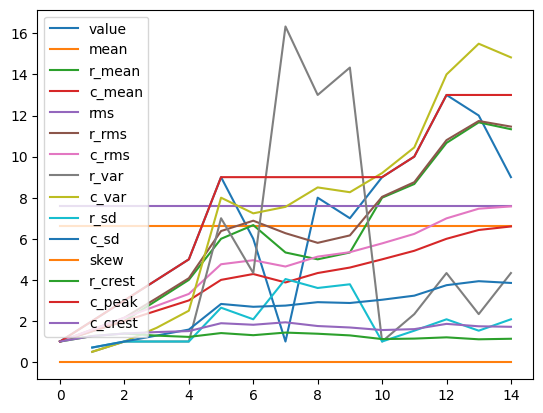

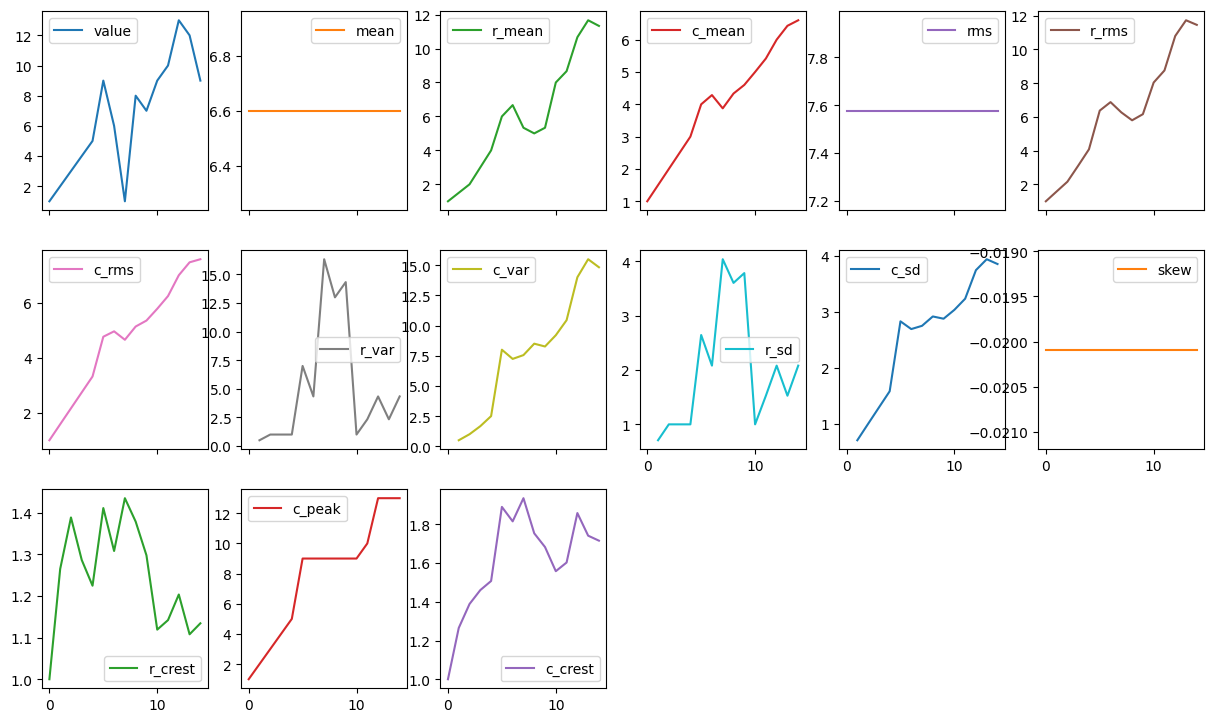

In [ ]:
test = time_domain()
test.pd_allfeature(df=df,col='value')
df

# FREQUENCY DOMAIN

|Features | Column outout name|
|----|----|
|2|2|

The <i>pd_allfeatures()</i> function will also plot all features out !

Example dataset

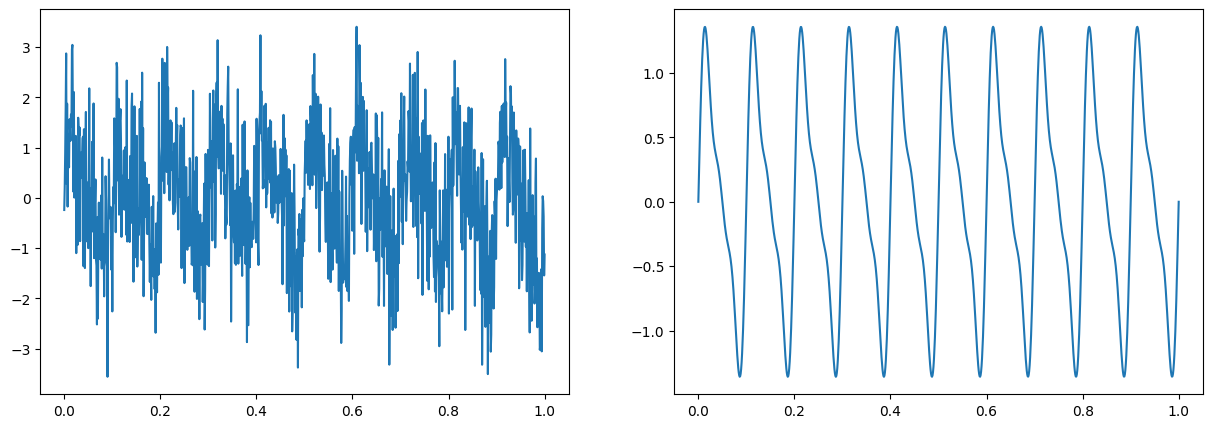

In [ ]:
# Example dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000)
y0 = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 20 * t) + 0.2 * np.sin(2 * np.pi * 30 * t)
y = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 20 * t) + 0.2 * np.sin(2 * np.pi * 30 * t) + np.random.randn(1000)
df = pd.DataFrame({'value':y})

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(t,y)
ax[1].plot(t,y0)

## Define functions

In [ ]:
import numpy as np
import pandas as pd
class mine_frequency_domain:
    def __init__(self):
        pass

    # Transform the signal into the frequency domain with FFT
    def pd_fft(self, y):
        fft = np.fft.fft(y)
        psd = np.abs(fft) ** 2
        return psd

    # calculating rolling psd
    def pd_r_psd(self, df, col, window):
        psd = []
        for i in range(len(df)):
            x = df[col][max(0, i - window + 1):i + 1]
            psd.append(np.abs(np.fft.fft(x)) ** 2 / len(x))
        df['r_psd'] = psd
        return df

    # calculating cumulative psd
    def pd_c_psd(self, df, col):
        psd = []
        for i in range(len(df)):
            x = df[col][:i + 1]
            psd.append(np.abs(np.fft.fft(x)) ** 2 / len(x))
        df['c_psd'] = psd
        return df

    # calculate all features
    def pd_allfeature(self, df, col, window=3):
        # psd
        self.pd_r_psd(df, col, window)
        self.pd_c_psd(df, col)
        # Plot all out
        df.plot()
        df.plot(subplots = True,layout=(5,6),figsize=(15,15))
        return df

## Testing

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

freq = np.fft.fftfreq(t.shape[-1])
print(np.fft.fft(df['value'],n=1000).imag)
ax.plot(freq*1000,np.fft.fft(df['value'],n=1000).imag,label='img')
ax.plot(freq*1000,np.fft.fft(df['value']).real,label='real')
#ax.set_xlim([0,500])
ax.legend()

In [ ]:
def find_index(arr, threshold):
  print(len(arr))
  for i in range(len(arr)):
    if arr[i] > threshold or arr[i] < - threshold:
      print('index: {}, value: {}'.format(i,arr[i]))

find_index(np.fft.fft(df['value'],n=1000).imag,100)

# TIME - FREQUENCY DOMAIN

# Create feature

## Categorical feature

Dateset with non-numerical data like label, categories,...

In [ ]:
# Examples dataset with categories
df_ex_cate = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

Common way of mapping is simply like below. However, this is not generally a useful approach in Scikit-Learn: the package's models make the fundamental assumption that numerical features reflect algebraic quantities. Which can express like:

'Queen Anne' + 'Formont' = 'Wallingford' (1 +2 =3)

--> this make no sense

-> Lead to other method like: one-hot encoding

In [ ]:
# Common mapping
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

### One-hot encodeing
Turn each labels into each columns, which is now represent 0 or 1 for each type of label.

BUT: If contain many labels, this method will create many columns, hence greatly increase the size of the dataset

In [ ]:
# One-hot encoding method
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
X = vec.fit_transform(df_ex_cate)